In [88]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

In [54]:
%matplotlib inline

In [2]:
tsdf = pd.DataFrame(data=np.random.randn(10, 3), columns=['A', 'B', 'C'],index=pd.date_range('1/1/2018',periods=10))

In [65]:
tsdf

,A,B,C
2018-01-01,-1.119744,3.210192,0.140761
2018-01-02,-1.025044,-0.892320,2.508011
2018-01-03,0.069094,0.063702,-0.731926
2018-01-04,-0.023612,0.220653,-0.377677
2018-01-05,0.349381,0.218046,-1.089990
2018-01-06,-1.101047,0.230095,1.089551
2018-01-07,0.790173,0.403562,0.307876
2018-01-08,0.350043,1.261137,0.214332
2018-01-09,0.212066,0.340718,-0.321195
2018-01-10,-0.321919,-0.307435,-1.029718


In [14]:
arr1 = np.random.rand(2,3)

In [19]:
arr2 = np.random.randn(20,20)

In [17]:
arr1.mean(), arr1.std()

(0.4962297103369111, 0.23992115749370521)

In [20]:
arr2.mean(),arr2.std()

(0.079514833413953989, 1.0232535927470956)

In [24]:
idx_list=[]
row_list=[]
for index, row in tsdf.iterrows():
    idx_list.append(index)
    row_list.append(row)

In [42]:
tsdf_plus = tsdf.applymap(lambda x: x+1)

In [43]:
tsdf_plus

,A,B,C
2018-01-01,-0.119744,4.210192,1.140761
2018-01-02,-0.025044,0.107680,3.508011
2018-01-03,1.069094,1.063702,0.268074
2018-01-04,0.976388,1.220653,0.622323
2018-01-05,1.349381,1.218046,-0.089990
2018-01-06,-0.101047,1.230095,2.089551
2018-01-07,1.790173,1.403562,1.307876
2018-01-08,1.350043,2.261137,1.214332
2018-01-09,1.212066,1.340718,0.678805
2018-01-10,0.678081,0.692565,-0.029718


In [44]:
tsdf_plus - tsdf

,A,B,C
2018-01-01,1.0,1.0,1.0
2018-01-02,1.0,1.0,1.0
2018-01-03,1.0,1.0,1.0
2018-01-04,1.0,1.0,1.0
2018-01-05,1.0,1.0,1.0
2018-01-06,1.0,1.0,1.0
2018-01-07,1.0,1.0,1.0
2018-01-08,1.0,1.0,1.0
2018-01-09,1.0,1.0,1.0
2018-01-10,1.0,1.0,1.0


In [45]:
tsdf_cp = tsdf.copy()

In [46]:
tsdf_cp.eq(tsdf)

,A,B,C
2018-01-01,True,True,True
2018-01-02,True,True,True
2018-01-03,True,True,True
2018-01-04,True,True,True
2018-01-05,True,True,True
2018-01-06,True,True,True
2018-01-07,True,True,True
2018-01-08,True,True,True
2018-01-09,True,True,True
2018-01-10,True,True,True


In [47]:
tsdf_cp.equals(tsdf)

True

# series and index 

In [49]:
pd.Series(data=[1,2,3,4,5],index=list('abcde'))

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [58]:
tsdf_idx = tsdf.index

In [70]:
tsdf_idx[1]

Timestamp('2018-01-02 00:00:00', freq='D')

In [59]:
type(tsdf_idx)

pandas.core.indexes.datetimes.DatetimeIndex

In [60]:
tsdf_series = pd.Series(tsdf_idx)

In [61]:
tsdf_series.at[0]

Timestamp('2018-01-01 00:00:00')

In [66]:
tsdf.iat[0,0]

-1.119744254705503

In [69]:
tsdf.at[tsdf_idx[0],'A']

-1.119744254705503

In [75]:
tsdf.loc[tsdf_idx[0],'A']

-1.119744254705503

In [76]:
s1 = pd.Series(data = {'a':1,'b':2})

In [81]:
A = tsdf.A

In [82]:
type(A)

pandas.core.series.Series

In [84]:
A.index.equals(tsdf.index)

True

In [85]:
s1['b'] = 3

In [86]:
s1

a    1
b    3
dtype: int64

In [87]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [92]:
df_data2 = pd.DataFrame(data2)

In [93]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
a    2 non-null int64
b    2 non-null int64
c    1 non-null float64
dtypes: float64(1), int64(2)
memory usage: 120.0 bytes


In [94]:
df_data2

,a,b,c
0,1,2,NaN
1,5,10,20.0


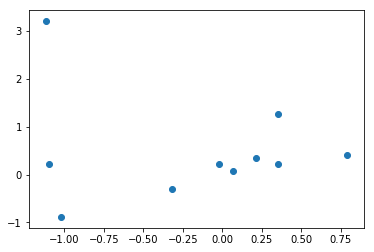

In [103]:
plt.scatter(tsdf['A'],tsdf['B'])

In [3]:
!pwd

/Users/Shawn_Ma/Desktop/python practice


## 数据分析范例1: babynames数据集

In [5]:
names1880 = pd.read_csv('/Users/Shawn_Ma/Desktop/pydata-book-2nd-edition/datasets/babynames/yob1880.txt',\
                        names=['name','sex','births']
)

In [7]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 46.9+ KB


In [8]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [9]:
years= range(1880,2011)

In [11]:
pieces=[]

In [12]:
columns = ['name','sex','births']

In [13]:
for year in years:
    path='/Users/Shawn_Ma/Desktop/pydata-book-2nd-edition/datasets/babynames/yob%d.txt' %year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [17]:
names=pd.concat(pieces,ignore_index=True)

In [21]:
total_births = pd.pivot_table(data=names,index='year',columns='sex',values='births',aggfunc=sum)

In [51]:
total_births_crstb = pd.crosstab(index=names['year'],columns=names['sex'],\
                                 values=names['births'],aggfunc=sum)

In [52]:
total_births_crstb.tail(10)

sex,F,M
year,,
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


In [23]:
total_births.tail(10)

sex,F,M
year,,
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


##### prop为某一个名字在某个性别，某个年份内出现的比例

In [24]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births / births.sum()
    return group

In [26]:
ng = names.groupby(['year','sex'])

In [35]:
type(ng.get_group((1880,'M')))

pandas.core.frame.DataFrame

In [37]:
names= ng.apply(add_prop)

In [42]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

##### find out man whose name is marry! 

In [41]:
names.loc[(names.name=='Mary')&(names.sex=='M')]

,name,sex,births,year,prop
1273,Mary,M,27,1880,0.000244
3238,Mary,M,29,1881,0.000288
5277,Mary,M,30,1882,0.000264
7407,Mary,M,32,1883,0.000306
9610,Mary,M,36,1884,0.000315
11910,Mary,M,38,1885,0.000352
14323,Mary,M,32,1886,0.000289
16671,Mary,M,47,1887,0.000463
19223,Mary,M,50,1888,0.000414
21893,Mary,M,41,1889,0.000371


In [53]:
mary = names.loc[(names.name=='Mary')]

In [64]:
mary.set_index('year',inplace=True)

In [70]:
mary_pivot = mary.pivot(columns='sex',values='prop')

In [76]:
mary_pivot.columns

Index([u'F', u'M'], dtype='object', name=u'sex')

##### 想要绘图时呈现出分组的效果，column也必须变为index

In [316]:
plt.rcParams

RcParams({u'_internal.classic_mode': True,
          u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.embed_limit': 20.0,
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.html': u'none',
          u'animation.html_args': [],
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.autolimit_mode': u'round_numbers',
          u'axes.axisbelow': True,
          u'axes.edgecolor': u'white',
          u'axes.facecolor': u'#E5E5E5',
          u'axes.formatter.limits': [-7, 7],
          u'axes.formatter.min_exponent': 0,
          u'axes.formatter

In [337]:
plt.rc('figure',figsize=(20,10))  # set figure size
plt.rc('axes',labelsize=18,titlesize=22) # set label size, titlesize
plt.rcParams['xtick.labelsize']=14  # set x axis label size
plt.rcParams['ytick.labelsize']=14
plt.rcParams['legend.fontsize']=15
# pd.set_option('display.mpl_style',None)

In [269]:
import matplotlib.style as stl

In [307]:
stl.use('ggplot') 
# 使用ggplot风格的图

In [ ]:
np.random.seed(19680801)
data = np.random.randn(2, 100)
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])
plt.show()

Text(0.5,0,u'x')

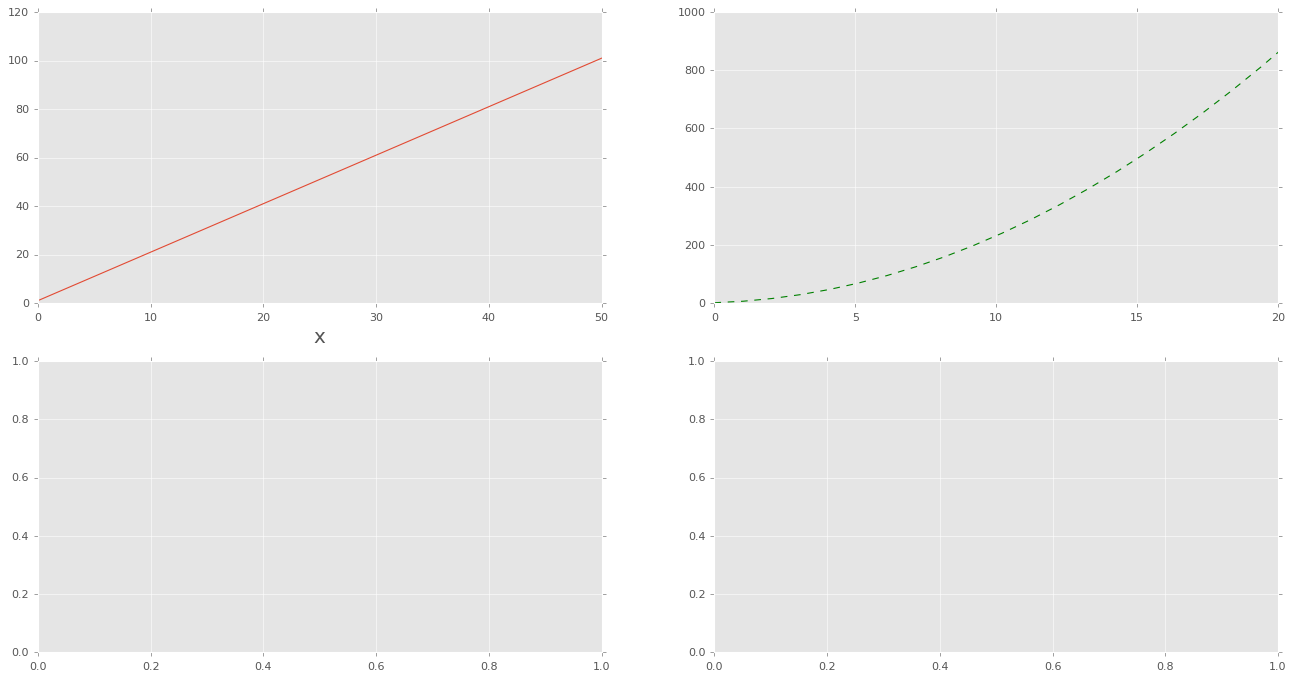

In [322]:
# matplotlib小练习
fg,axes = plt.subplots(2,2)
x=np.linspace(0,50,50) # np.ndarray
y1=2*x+1
y2=2*x**2+3*x+1
axes[0,0].plot(x,y1)
axes[0,1].plot(x,y2,color='g',linestyle='--')
axes[0,1].set_ylim(0,1000)
axes[0,1].set_xlim(0,20)
axes[0,0].set_xlabel('x')

Text(0.5,1,u'People who named Mary')

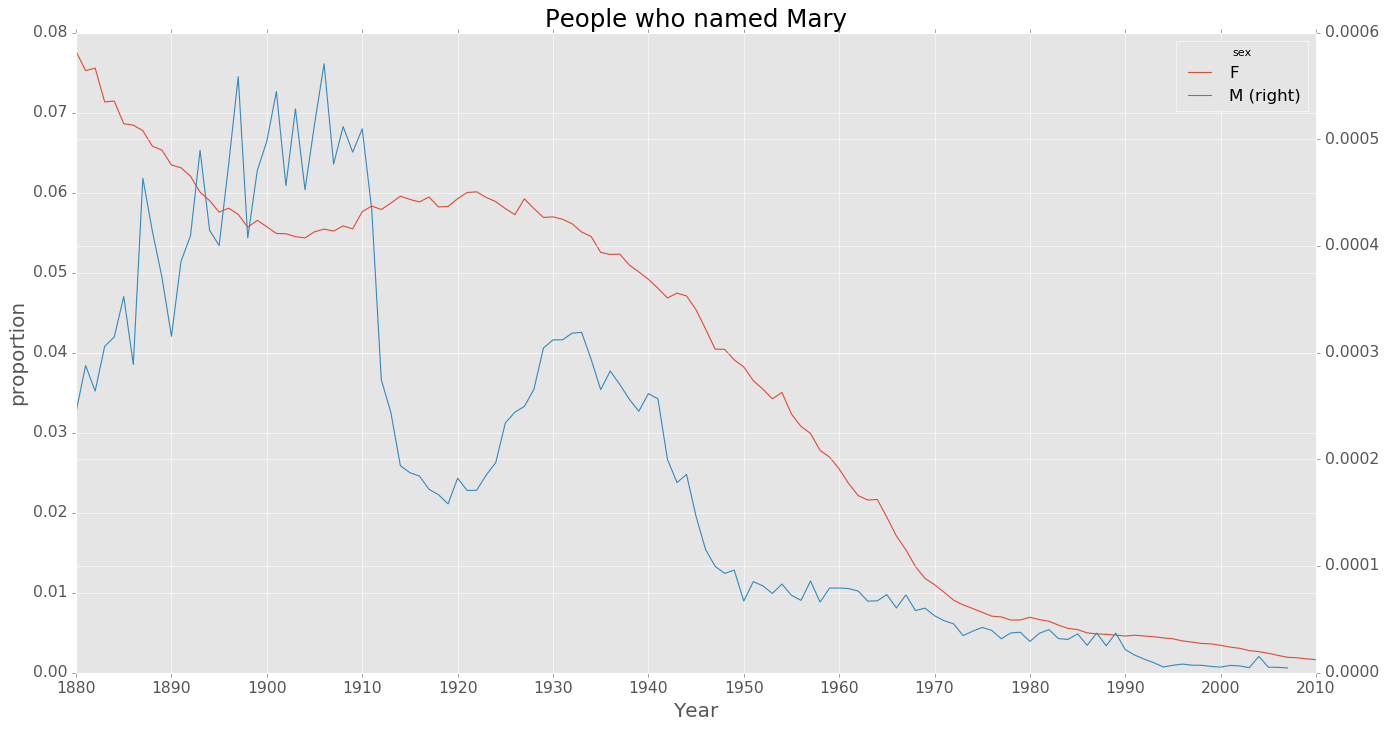

In [341]:
mary_ax = mary_pivot.plot(legend=True,\
               figsize=(20,10),secondary_y=['M'],\
                xticks=range(1880,2011,10),grid=1)
mary_ax.set_ylabel('proportion',fontsize=18)
mary_ax.set_xlabel('Year',fontsize=18)
mary_ax.set_title('People who named Mary')

In [129]:
names_gp = names.groupby(['year','sex'])

In [132]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

In [133]:
top1000 = names_gp.apply(get_top1000)

In [139]:
top1000.shape[0], names.shape[0]

(261877, 1690784)

In [178]:
top1000.reset_index(drop=1,inplace=True)

In [141]:
boys = top1000.loc[top1000.sex=='M']

In [142]:
girls = top1000.loc[top1000.sex=='F']

In [145]:
total_births1000 = pd.pivot_table(data=top1000, index='year',columns='name',\
                                  values='births',aggfunc=sum)

/Users/Shawn_Ma/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [147]:
total_births1000.columns

Index([u'Aaden', u'Aaliyah', u'Aarav', u'Aaron', u'Aarush', u'Ab', u'Abagail',
       u'Abb', u'Abbey', u'Abbie',
       ...
       u'Zoa', u'Zoe', u'Zoey', u'Zoie', u'Zola', u'Zollie', u'Zona', u'Zora',
       u'Zula', u'Zuri'],
      dtype='object', name=u'name', length=6868)

In [148]:
subset=total_births1000[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ef20110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1186e0fd0>], dtype=object)

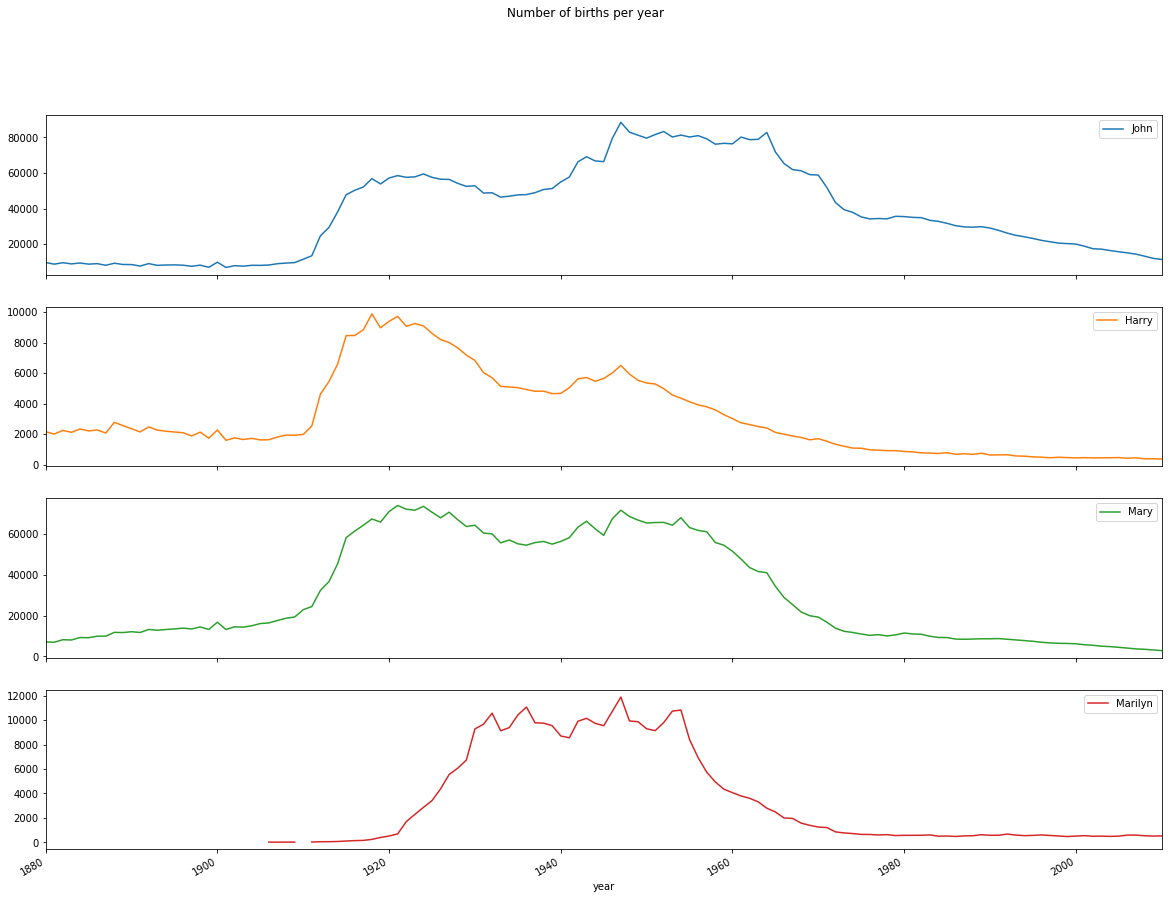

In [150]:
subset.plot(subplots=True,title='Number of births per year')

#### 假设：父母越来越不愿意给小孩起常见的名字，名字越来越多样化
#### 验证方法1：计算top1000名字的小孩所占的比例

In [266]:
table = top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc=sum)

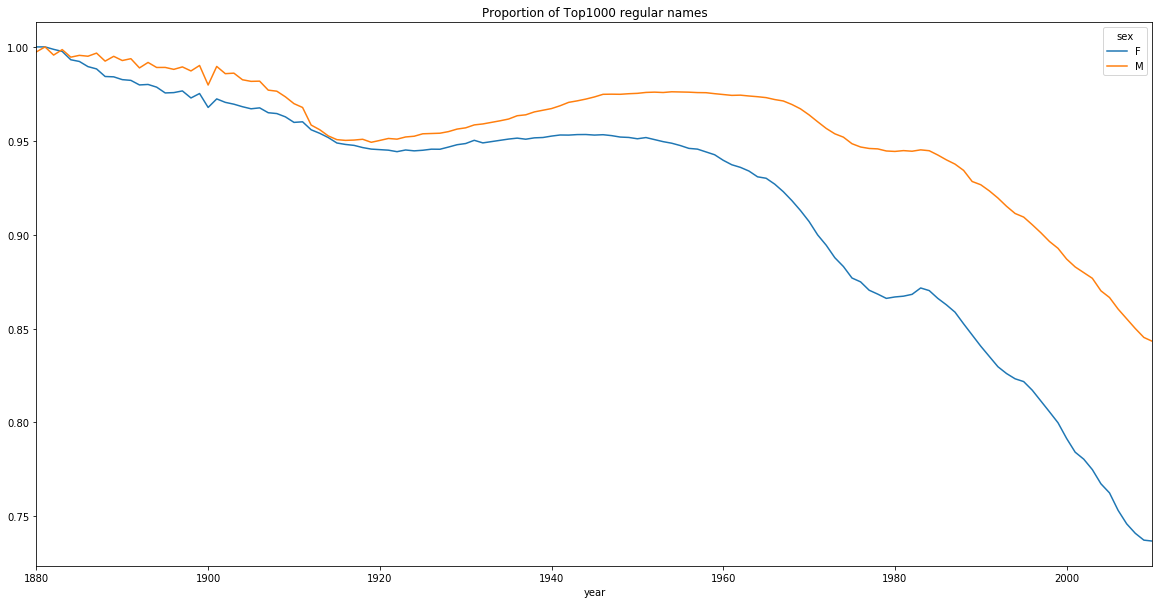

In [267]:
table.plot(title='Proportion of Top1000 regular names')

#### 验证方法2: 计算占出生总人数前50% 的姓名的数量

In [154]:
df=boys[boys.year==2010]

In [167]:
prop_cumsum = df.prop.cumsum().reset_index(drop=True)

In [168]:
prop_cumsum.index()

0     0.011523
1     0.020934
2     0.029959
3     0.038930
4     0.047817
5     0.056579
6     0.065155
7     0.073414
8     0.081528
9     0.089621
10    0.097648
11    0.105406
12    0.112852
13    0.120276
14    0.127672
15    0.135023
16    0.142368
17    0.149603
18    0.156827
19    0.164021
20    0.170722
21    0.177191
22    0.183452
23    0.189655
24    0.195815
25    0.201832
26    0.207769
27    0.213578
28    0.219354
29    0.225070
30    0.230577
31    0.236056
32    0.241513
33    0.246968
34    0.252391
35    0.257477
36    0.262508
37    0.267538
38    0.272413
39    0.277178
40    0.281796
41    0.286387
42    0.290850
43    0.295305
44    0.299753
45    0.304049
46    0.308335
47    0.312602
48    0.316811
49    0.320916
Name: prop, dtype: float64

In [180]:
int(prop_cumsum.searchsorted(0.5))

116

In [170]:
prop_cumsum[115:117]

115    0.498861
116    0.500652
Name: prop, dtype: float64

In [181]:
def get_quantile_count(group,q=0.5):
    prop_cumsum = group.sort_values(by='prop',ascending=0).prop.cumsum()
    return int(prop_cumsum.searchsorted(q))+1

In [183]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

In [189]:
diversity = diversity.unstack('sex')

In [191]:
diversity.columns

Index([u'F', u'M'], dtype='object', name=u'sex')

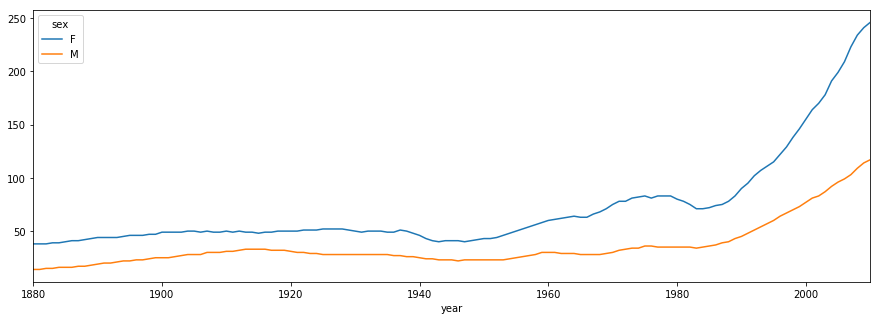

In [194]:
diversity.plot(figsize=(15,5))

#### 名字中最后一个字母的分布的变化情况

In [195]:
get_last_letter = lambda x: x[-1]

In [199]:
names['name_last_letter']=names.name.apply(get_last_letter)

In [202]:
table = names.pivot_table(values='births',index='name_last_letter',\
                  columns=['sex','year'],aggfunc=sum)

In [212]:
table

sex                     F                                               \
year                 1880     1881     1882     1883     1884     1885   
name_last_letter                                                         
a                 31446.0  31581.0  36536.0  38330.0  43680.0  45408.0   
b                     NaN      NaN      NaN      NaN      NaN      NaN   
c                     NaN      NaN      5.0      5.0      NaN      NaN   
d                   609.0    607.0    734.0    810.0    916.0    862.0   
e                 33378.0  34080.0  40399.0  41914.0  48089.0  49616.0   
f                     NaN      NaN      NaN      NaN      NaN      NaN   
g                     7.0      5.0     12.0      8.0     24.0     11.0   
h                  4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   
i                    61.0     78.0     81.0     76.0     84.0     92.0   
j                     NaN      NaN      NaN      NaN      NaN      NaN   
k                    13.0     15.0     11.0     17.0     21.0     18.0   
l                  2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   
m                    58.0     57.0     81.0     86.0     79.0     75.0   
n                  3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   
o                    30.0     49.0     35.0     47.0     74.0     84.0   
p                     NaN      NaN      NaN      NaN      NaN      NaN   
q                     NaN      NaN      NaN      NaN      NaN      NaN   
r                   481.0    417.0    590.0    640.0    718.0    799.0   
s                  1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   
t                  2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   
u                   380.0    427.0    410.0    444.0    490.0    495.0   
v                     NaN      NaN      NaN      NaN      NaN      NaN   
w                     NaN      5.0      NaN      NaN      NaN      NaN   
x                     NaN      NaN      NaN      7.0      NaN      NaN   
y                 10469.0  10404.0  12145.0  12063.0  13917.0  13927.0   
z                   106.0     95.0    106.0    141.0    148.0    150.0   

sex                                                     ...            M  \
year                 1886     1887     1888     1889    ...         2001   
name_last_letter                                        ...                
a                 49100.0  48942.0  59442.0  58631.0    ...      39124.0   
b                     NaN      NaN      NaN      NaN    ...      50950.0   
c                     NaN      NaN      NaN      NaN    ...      27113.0   
d                  1007.0   1027.0   1298.0   1374.0    ...      60838.0   
e                 53884.0  54353.0  66750.0  66663.0    ...     145395.0   
f                     NaN      NaN      NaN      NaN    ...       1758.0   
g                    18.0     25.0     44.0     28.0    ...       2151.0   
h                  7146.0   7141.0   8630.0   8826.0    ...      85959.0   
i                    85.0    105.0    141.0    134.0    ...      20980.0   
j                     NaN      NaN      NaN      NaN    ...       1069.0   
k                    27.0     19.0     21.0     22.0    ...      42477.0   
l                  5721.0   6175.0   7900.0   8395.0    ...     153648.0   
m                   103.0     90.0    123.0    137.0    ...      41967.0   
n                  5242.0   5512.0   6833.0   7103.0    ...     616099.0   
o                    93.0     97.0    134.0    142.0    ...      82146.0   
p                     NaN      NaN      NaN      NaN    ...       3419.0   
q                     NaN      NaN      NaN      NaN    ...        602.0   
r                   917.0    910.0   1207.0   1214.0    ...     165377.0   
s                  2524.0   2803.0   3582.0   3569.0    ...     143791.0   
t                  3017.0   3140.0   3816.0   3784.0    ...      47688.0   
u                   511.0    476.0    541.0    469.0    ...       1833.0   
v                     NaN    

In [213]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [217]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [219]:
subtable

sex                      F                            M                    
year                  1910      1960      2010     1910      1960      2010
name_last_letter                                                           
a                 108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                      NaN     694.0     450.0    411.0    3912.0   38859.0
c                      5.0      49.0     946.0    482.0   15476.0   23125.0
d                   6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e                 133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                      NaN      20.0      97.0    152.0    9224.0    2255.0
g                     57.0     318.0     657.0    437.0   20235.0    2666.0
h                  20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i                    605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                      NaN       NaN     159.0      NaN       NaN    1459.0
k                     48.0     315.0     626.0   7104.0  105315.0   35198.0
l                  17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m                    476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n                  31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o                    658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                      7.0      47.0      35.0    616.0   12102.0    2409.0
q                      NaN       NaN      53.0      NaN       NaN     342.0
r                   5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s                  15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t                  10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u                    271.0    1161.0     734.0     24.0     122.0    2318.0
v                      NaN     122.0     205.0     22.0      78.0    2723.0
w                      8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                      6.0      74.0    1279.0    770.0    3947.0   16352.0
y                  43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z                    967.0    1333.0    1238.0     33.0     392.0    3476.0

In [220]:
letter_prop = subtable/subtable.sum()

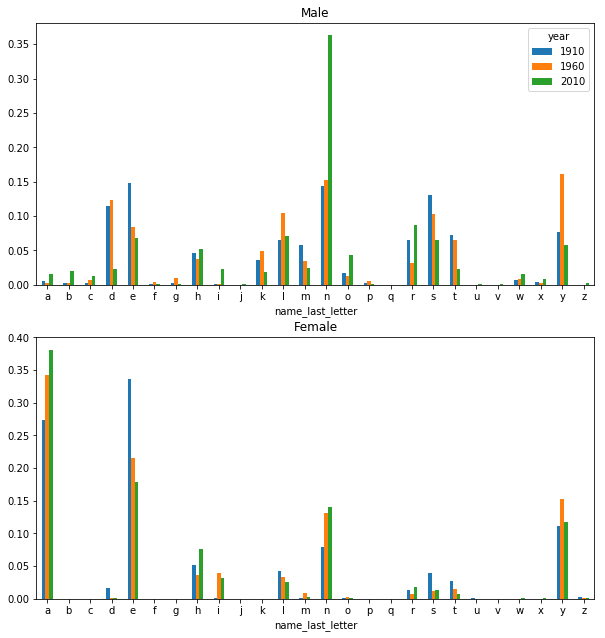

In [243]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
# axes是一个用于存放maplotlib.axes对象的numpy数组
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male') 
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)
plt.subplots_adjust(bottom=2,top=3)
# rot用于控制xlabel的角度，0表示不旋转。ax用于控制放到哪个subplot上，很方便
# plt.subplots_adjust用于调整subplot之间的边距, 不然会挤到一起

In [244]:
letter_prop= table/table.sum()

In [251]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
# T是为了将其变成时间序列的格式

In [252]:
dny_ts 

name_last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
1885,0.085472,0.146361,0.081882
1886,0.087647,0.149659,0.081681
1887,0.089072,0.148838,0.082870
1888,0.087707,0.151286,0.084919


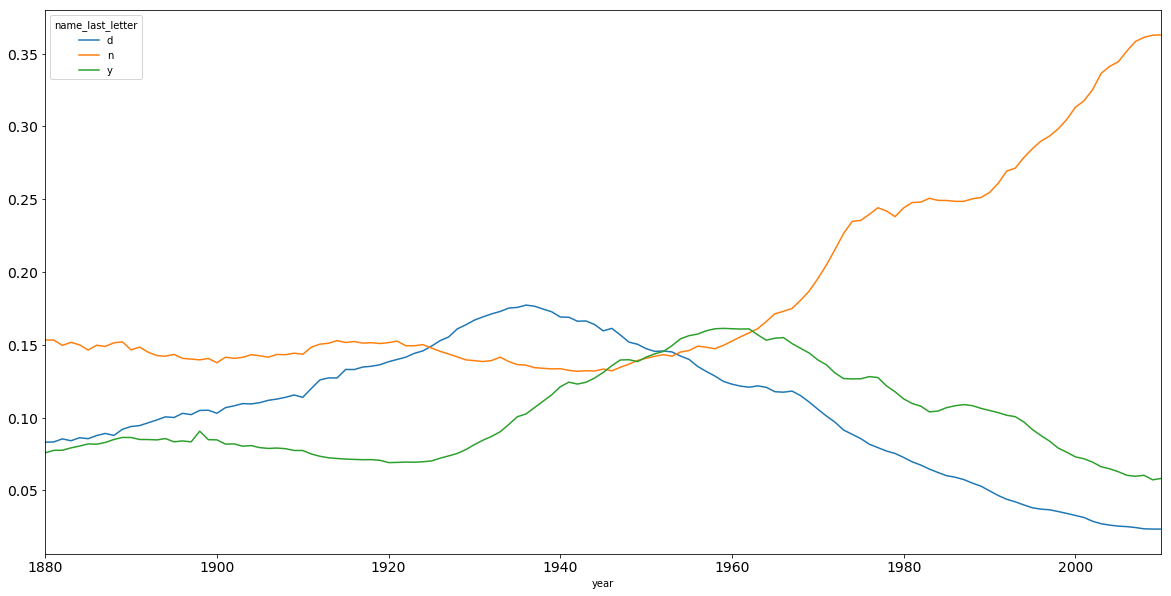

In [263]:
# fig,axes = plt.subplots(3,1,figsize=(10,8))
dny_ts.plot(subplots=0,figsize=(20,10),fontsize=14)